In [620]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore')

You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.


Conclusion: CMO Recommendations; provide data-driven recommendations/suggestions to your CMO using visualization.

In [621]:
marketing_data = pd.read_csv('marketing_data.csv')

In [622]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Description to the columns:
    
1. ID - Unique customer id

2. Year_Birth - DOB of customer

3. Education - Latest education qualification of customer

4. Marital_Status - Married/Single

5. Income - Houshold Annual income

6. Kidhome - Number of children in household

7. Teenhome - Number of teenagers in household

8. Dt_Customer - Date of enrolled in the company

9. Recency - Number of days since customers' last purchase

10. MntWines - Amount spent on wines since last 2 years

11. MntFruits - Amount spent on fruits since last 2 years

12. MntMeatProducts - Amount spent on Meat since last 2 years

13. MntFishProducts - Amount spent on Fish since last 2 years

14. MntGoldProds - Amount spent on Gold since last 2 years

15. MntSweetProducts - Amount spent on Sweet since last 2 years

16. NumDealsPurchases - Number of deals made with a discount

17. NumWebPurchases - Number of purchases made through company website

18. NumCatalogPurchases - Number of purchases using catalogues

19. NumStorePurchases - Number of purchases made directly in stores

20. NumWebVisitsMonth - Number of visits to website in last month

21. AcceptedCmp1 - whether customer accepted the offer in 1st campaign

22. AcceptedCmp2 - whether customer accepted the offer in 2nd campaign

23. AcceptedCmp3 - whether customer accepted the offer in 3rd campaign

AcceptedCmp4 - whether customer accepted the offer in 4th campaign

24. AcceptedCmp5 - whether customer accepted the offer in 5th campaign

25. Response - Whether customer accepted the offer in the last campaign

26. Complain - Whether customer raises a complaint in last 2 years

27.Country - Country where customer belongs to

#### Inspecting and cleaning the marketing data

In [623]:
marketing_data.shape

(2240, 28)

In [624]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [625]:
#Any missing values?
nan_df = marketing_data[marketing_data.isna().any(axis=1)]

In [626]:
nan_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [627]:
marketing_data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Income column has 24 missing value and white space

To remove the white space before and after the Income column

In [628]:
import re

In [629]:
marketing_data.columns = marketing_data.columns.str.replace(' ', '')

In [630]:
marketing_data['Income']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

Transforming Income column to numerical and not including the dollar sign ($)

In [631]:
marketing_data['Income'] = marketing_data['Income'].str.replace('$', '')
marketing_data['Income'] = marketing_data['Income'].str.replace(',', '').astype('float')

In [632]:
marketing_data['Income'].value_counts()

7500.0     12
35860.0     4
48432.0     3
46098.0     3
37760.0     3
           ..
26228.0     1
52973.0     1
78028.0     1
63967.0     1
6560.0      1
Name: Income, Length: 1974, dtype: int64

In [633]:
marketing_data['Income'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2240, dtype: bool

In [634]:
marketing_data.dropna(inplace=True)

In [635]:
# A clean dataset without missing values

marketing_data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [636]:
marketing_data['Dt_Customer']

0        6/16/14
1        6/15/14
2        5/13/14
3        5/11/14
4         4/8/14
          ...   
2235      3/7/13
2236     1/22/13
2237     12/3/12
2238    11/29/12
2239      9/1/12
Name: Dt_Customer, Length: 2216, dtype: object

In [637]:
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'])

In [638]:
marketing_data['Children'] = marketing_data['Kidhome'] + marketing_data['Teenhome']

In [639]:
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,4,0,0,0,0,0,0,0,US,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,8,0,0,0,0,0,0,0,SP,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,8,0,0,0,0,0,0,0,SP,1
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,3,0,0,0,0,0,0,0,IND,0


   ### Exploratory Data Analysis on customer relationship management
   
CRM: This will help to identify this company's profitable customers and tune its offers to increase profitability and also help identify sales opportunities.

Customer profiling and behavioural analysis

In [640]:
marketing_data['Age'] = 2021 - marketing_data['Year_Birth']

In [641]:
marketing_data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,0,51
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,0,60
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,1,63
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,2,54
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,1,32
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,0,0,0,0,0,1,0,SP,0,63
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,1,0,0,0,0,1,0,GER,0,67
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0,78,...,0,0,0,0,0,0,0,SP,1,54
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,0,0,0,0,0,0,0,US,1,67
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0,384,...,0,0,0,0,0,0,0,IND,1,67


In [642]:
#marketing_data_df = marketing_data.groupby(['Age'])['Income'].mean().reset_index()

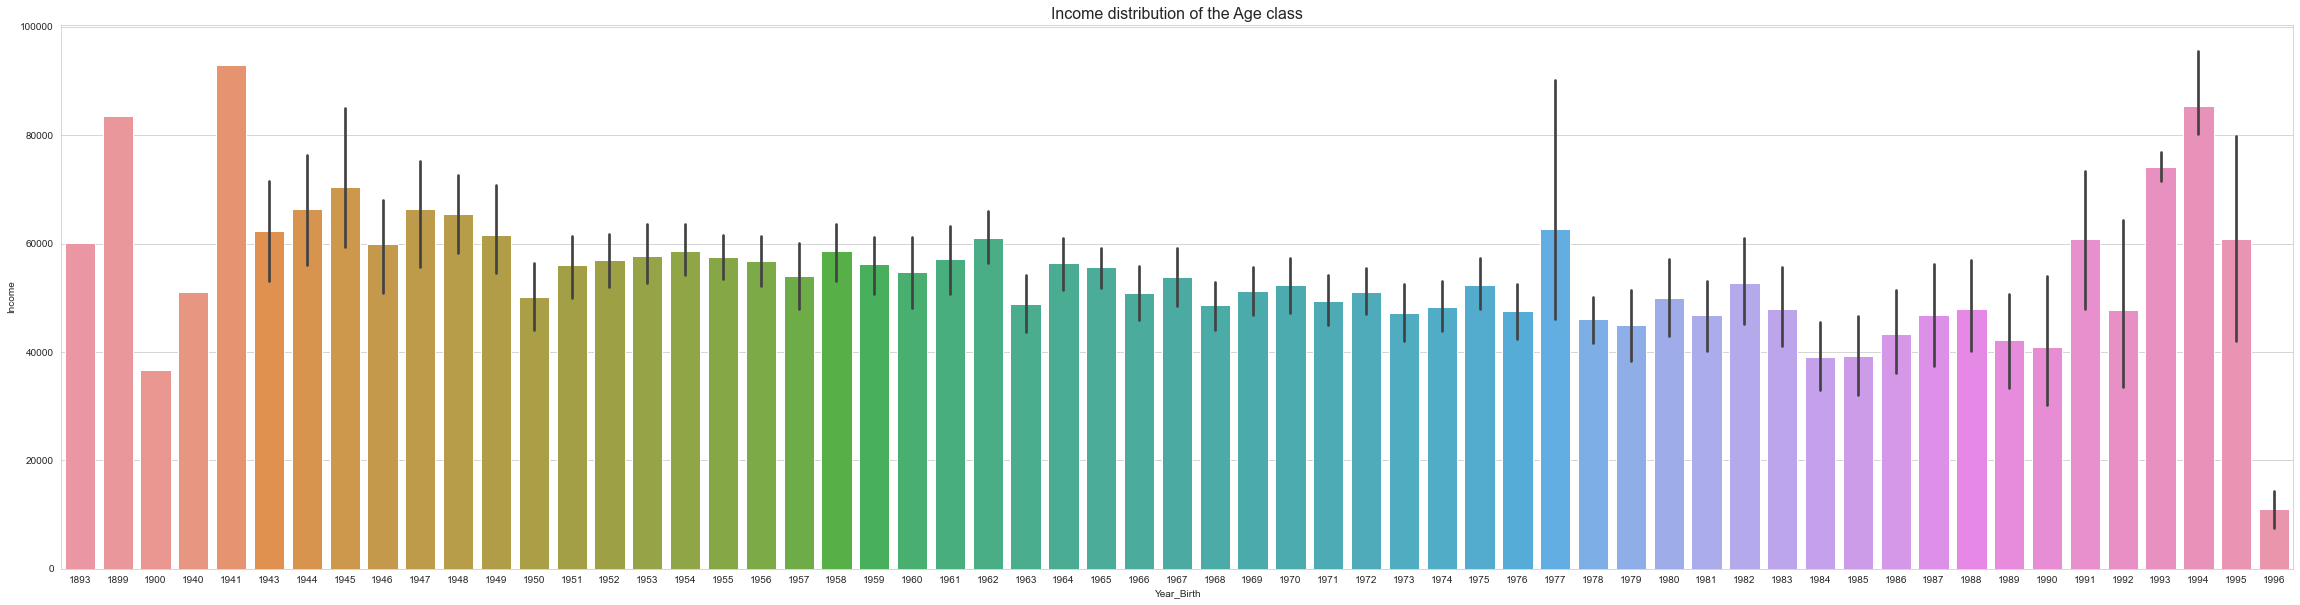

In [643]:
# Frequency of the Ages of the consumers based on their income

plt.figure(figsize=(40,10))
sns.barplot(x = 'Year_Birth', y = 'Income', data = marketing_data)
plt.title('Income distribution of the Age class', size=16)
plt.show()

In [644]:
#marketing_data = marketing_data[marketing_data['Year_Birth']< 100]

In [645]:
# Clustering the ages of the target market

marketing_data['Age_Group'] = pd.cut(marketing_data['Age'], bins=[0,35,50,120], labels=['Adult','Middle_Age','Senior_Citizens'])

In [646]:
marketing_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age,Age_Group
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,0,51,Senior_Citizens
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,0,60,Senior_Citizens
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,1,63,Senior_Citizens
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,2,54,Senior_Citizens
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,1,32,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,US,1,45,Middle_Age
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,SP,1,44,Middle_Age
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,SP,1,45,Middle_Age
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,IND,0,43,Middle_Age


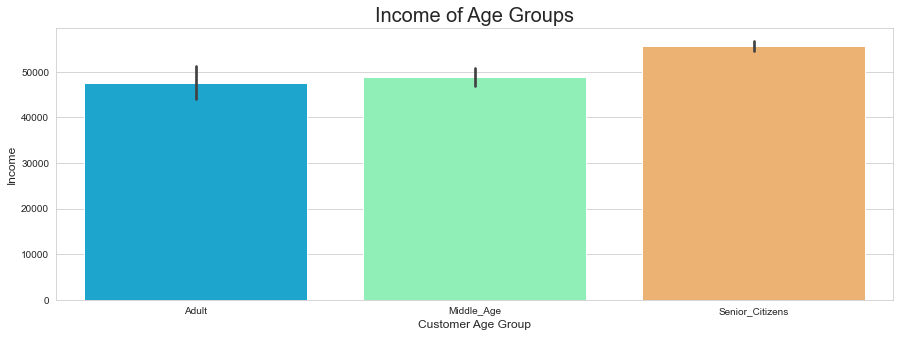

In [666]:
plt.figure(figsize = (15, 5))
sns.barplot(x='Age_Group', y='Income', data=marketing_data, palette='rainbow')
plt.title('Income of Age Groups', fontsize=20)
plt.xlabel('Customer Age Group',fontsize=12)
plt.ylabel('Income',fontsize=12);

The Senior Citizens tends to be the highest salary earners among the customers

<AxesSubplot:xlabel='Country', ylabel='Income'>

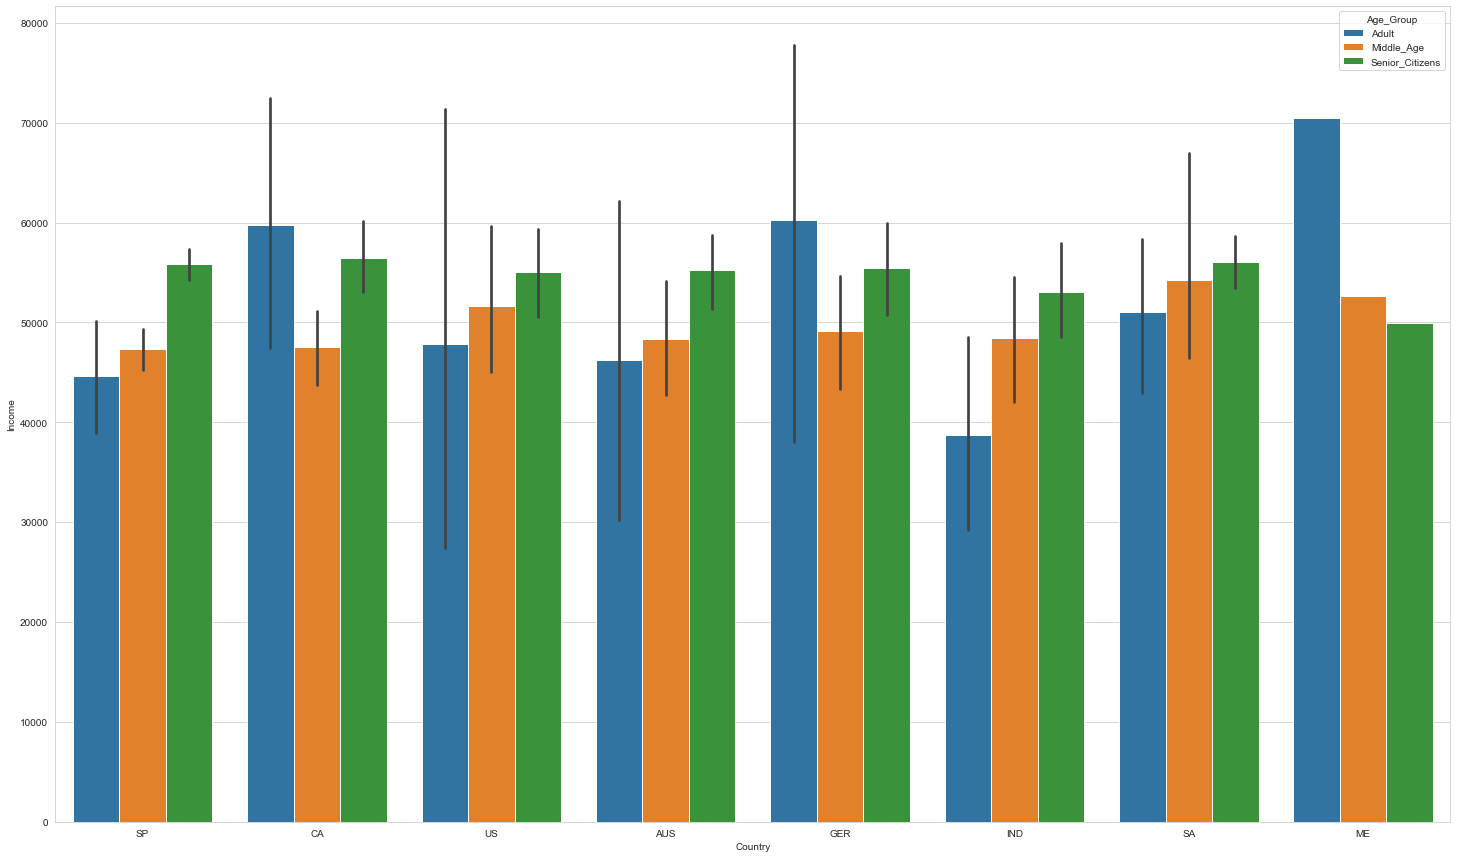

In [665]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Country', y = 'Income', hue= 'Age_Group', data = marketing_data)

Customers in Montenegro are the highest salary earners, most of these customers are the Adults, followed by the Middle_Age and the senior citizens are the lowest earners in this country. 

In [649]:
marketing_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age,Age_Group
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,0,51,Senior_Citizens
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,0,60,Senior_Citizens
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,1,63,Senior_Citizens
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,2,54,Senior_Citizens
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,1,32,Adult


In [650]:
marketing_data1 = marketing_data.groupby(['Education'])['Income'].mean().reset_index()

In [651]:
round(marketing_data1.nlargest(4, 'Income'))

,Education,Income
4,PhD,56145.0
3,Master,52918.0
2,Graduation,52720.0
0,2n Cycle,47633.0


In [652]:
round(marketing_data1.nsmallest(3, 'Income'))

,Education,Income
1,Basic,20306.0
0,2n Cycle,47633.0
2,Graduation,52720.0


The highest earners are PhD holdres with 56145 dollars, followed by Masters holders, and the least earners are the Basic class.

<AxesSubplot:xlabel='Education', ylabel='Income'>

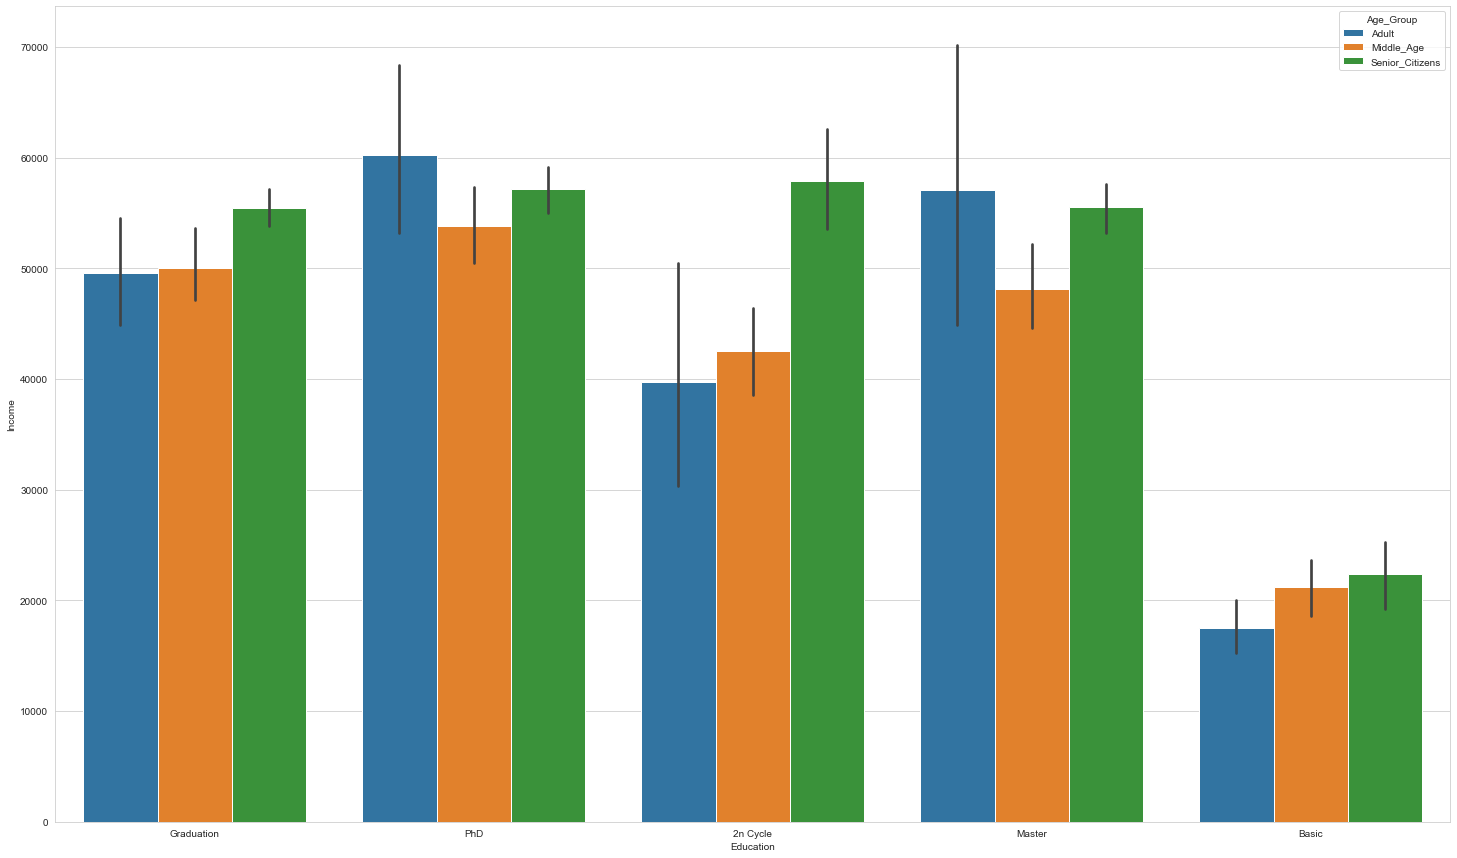

In [664]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Education', y = 'Income', hue = 'Age_Group', data = marketing_data)

Marital_status class with Income

In [654]:
marketing_data2 = marketing_data.groupby(['Marital_Status'])['Income'].mean().reset_index()

In [655]:
marketing_data2.nlargest(5, 'Income')

,Marital_Status,Income
0,Absurd,72365.500000
6,Widow,56481.552632
5,Together,53245.534031
2,Divorced,52834.228448
3,Married,51724.978996


In [656]:
round(marketing_data2.nsmallest(3, 'Income'))

,Marital_Status,Income
1,Alone,43789.0
7,YOLO,48432.0
4,Single,50995.0


The highest earners in Marital status class are the Absurd group and the young Adults in this group are the highest earners.

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

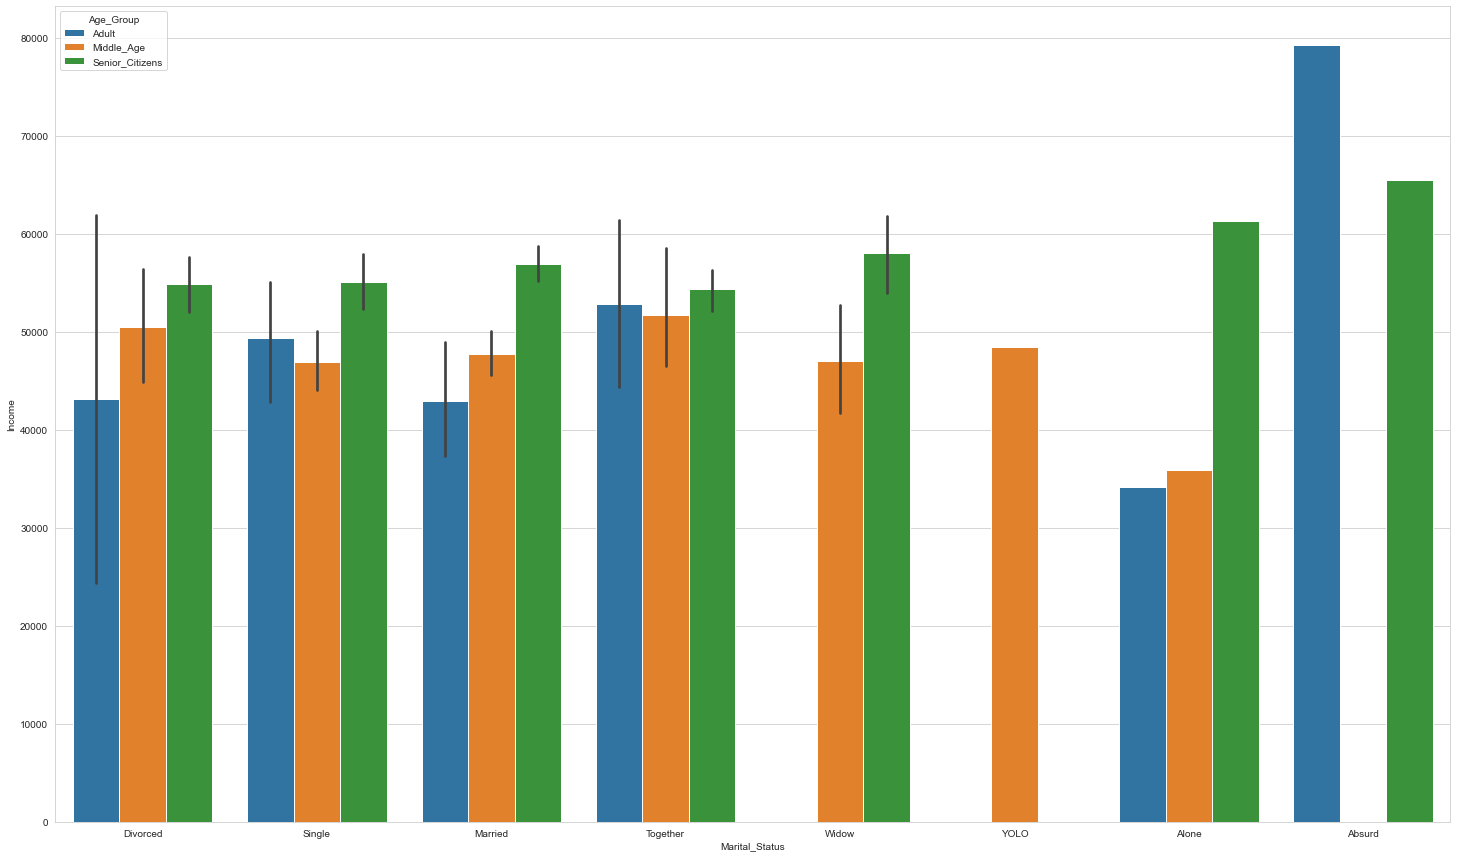

In [662]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Marital_Status', y = 'Income', hue = 'Age_Group', data = marketing_data)

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

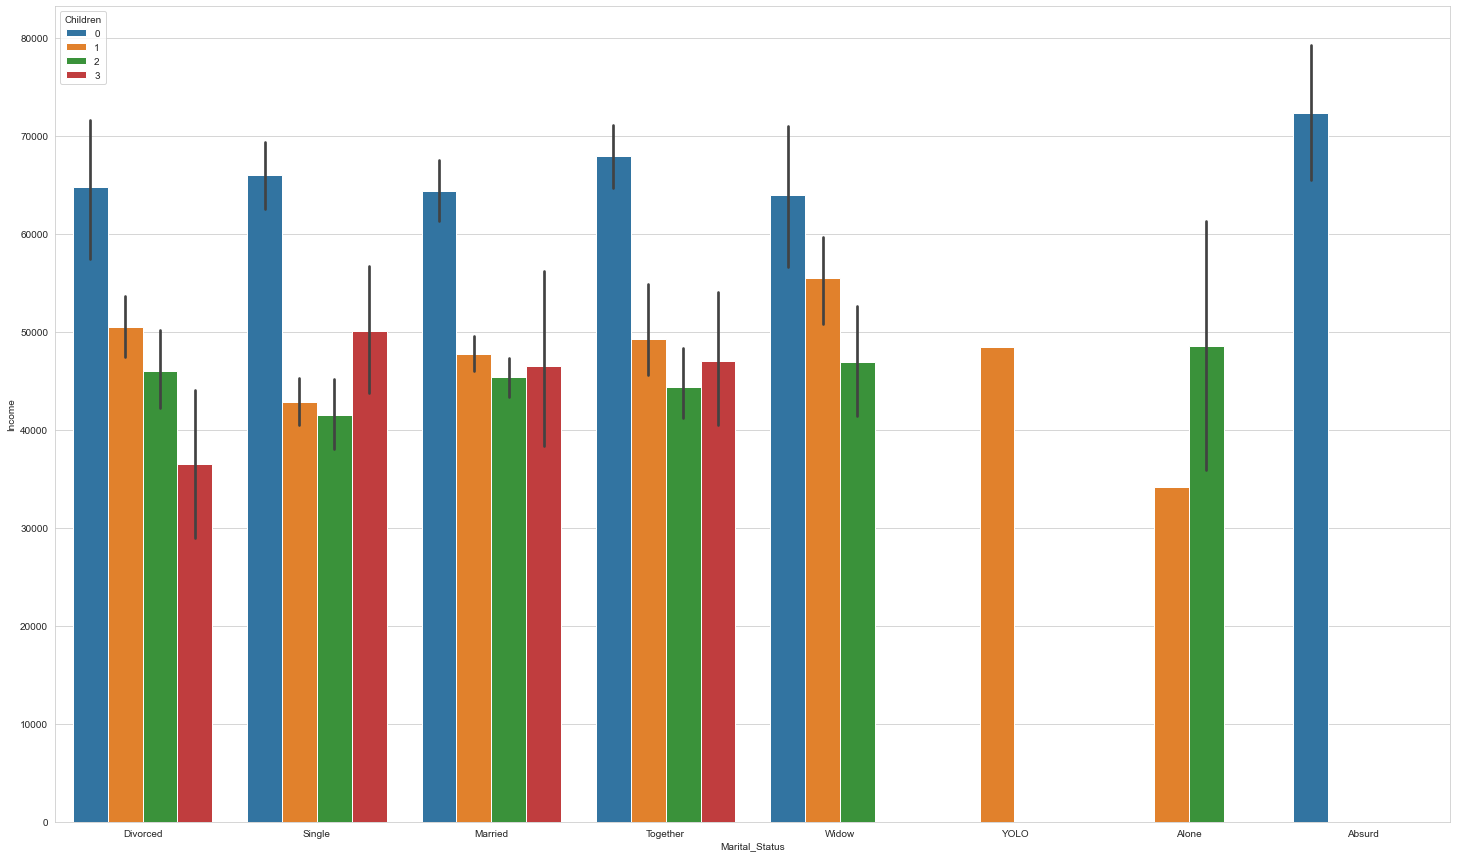

In [663]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Marital_Status', y = 'Income', hue = 'Children', data = marketing_data)

Most of the customers that has no child earns the highest salaries, and the Absurd class that are neither married or divorced are the highest earners and has no child at all.

Total number of customers in countries

Spain, according to the visualization has the largest customers, compared to other countries


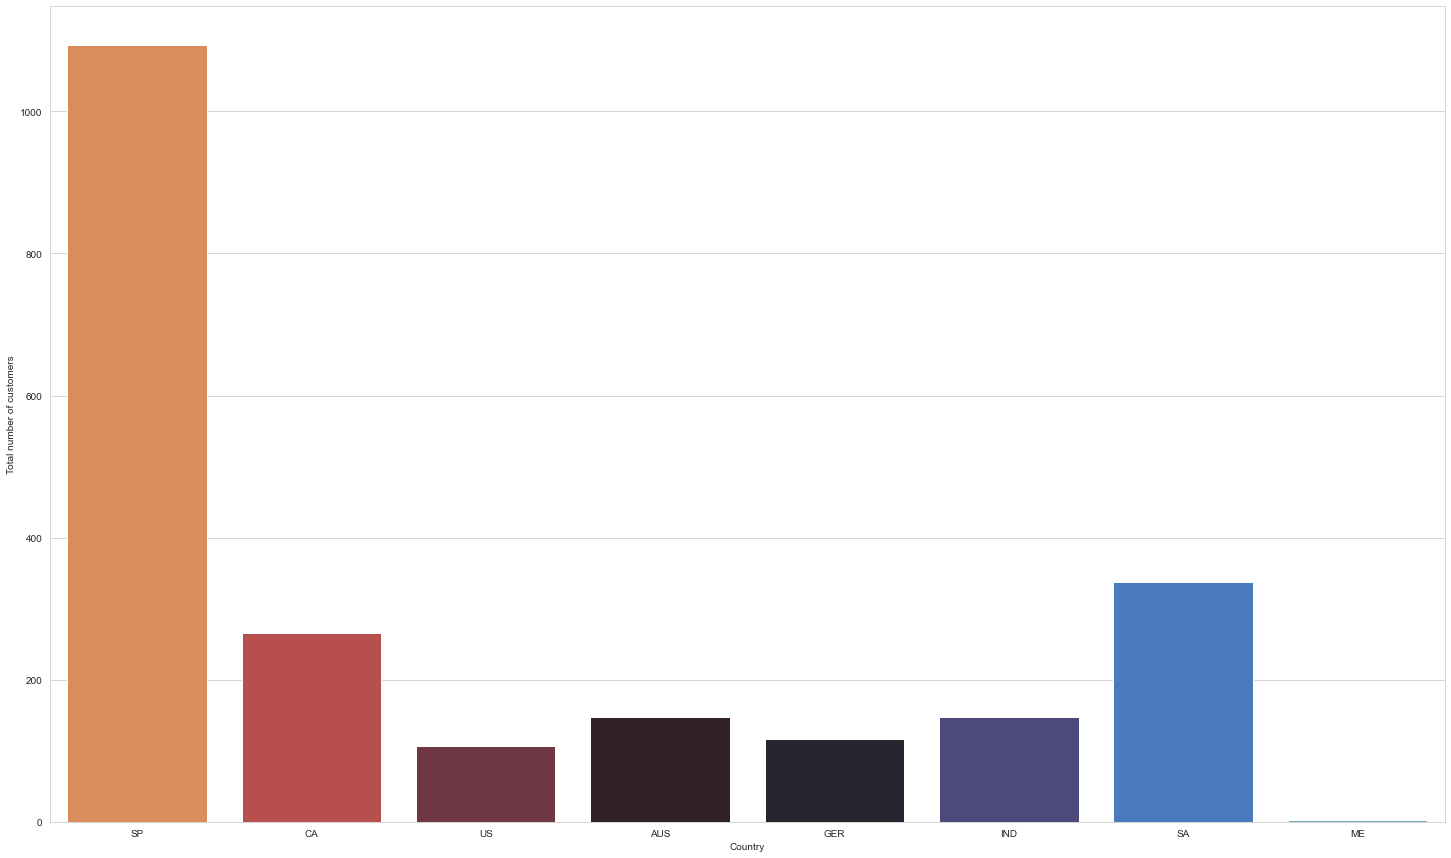

In [668]:
plt.figure(figsize = (25, 15))
sns.countplot(x = marketing_data['Country'], palette = 'icefire_r')
plt.ylabel('Total number of customers')

print('Spain, according to the visualization has the largest customers, compared to other countries')

#### Level of cash flow by customers purchases (Total Spent in two years on goods)

Real-time sales analysis - knowing what is bought, by whom, where, how often and when, a business can match supply more accurately with demand and reduce wasted capacity or store.

In [669]:
marketing_data['Total_Spent'] = (marketing_data['MntWines'] + marketing_data['MntFruits'] + marketing_data['MntMeatProducts']
                                             + marketing_data['MntGoldProds'] + marketing_data['MntFishProducts'] + marketing_data['MntSweetProducts'])

In [670]:
marketing_data['Age'] = 2021 - marketing_data['Year_Birth']

In [671]:
marketing_data.drop(['ID', 'Year_Birth'],axis=1, inplace=True)

In [672]:
marketing_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children,Age,Age_Group,Total_Spent
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,...,0,0,0,1,0,SP,0,51,Senior_Citizens,1190
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,0,0,1,1,0,CA,0,60,Senior_Citizens,577
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,...,0,0,0,0,0,US,1,63,Senior_Citizens,251
3,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,...,0,0,0,0,0,AUS,2,54,Senior_Citizens,11
4,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,...,0,0,0,1,0,SP,1,32,Adult,91


In [683]:
#customer_spent = marketing_data.groupby(['Income', 'Age_Group'])['Total_Spent'].mean().reset_index()

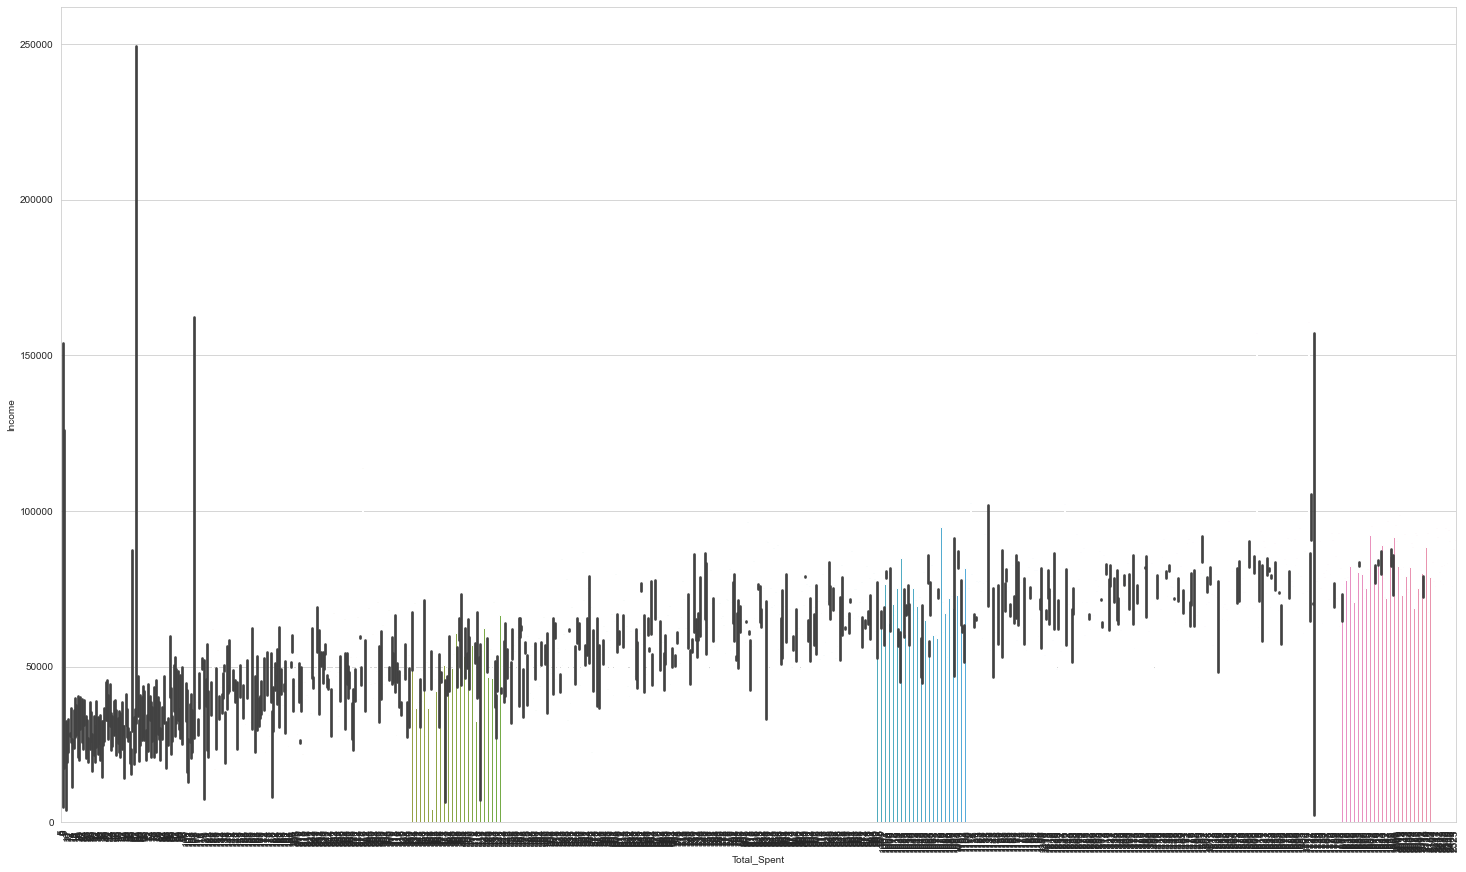

In [690]:
plt.figure(figsize = (25, 15))
ax = sns.barplot(x = 'Total_Spent', y = 'Income', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()


<AxesSubplot:xlabel='Age_Group', ylabel='Total_Spent'>

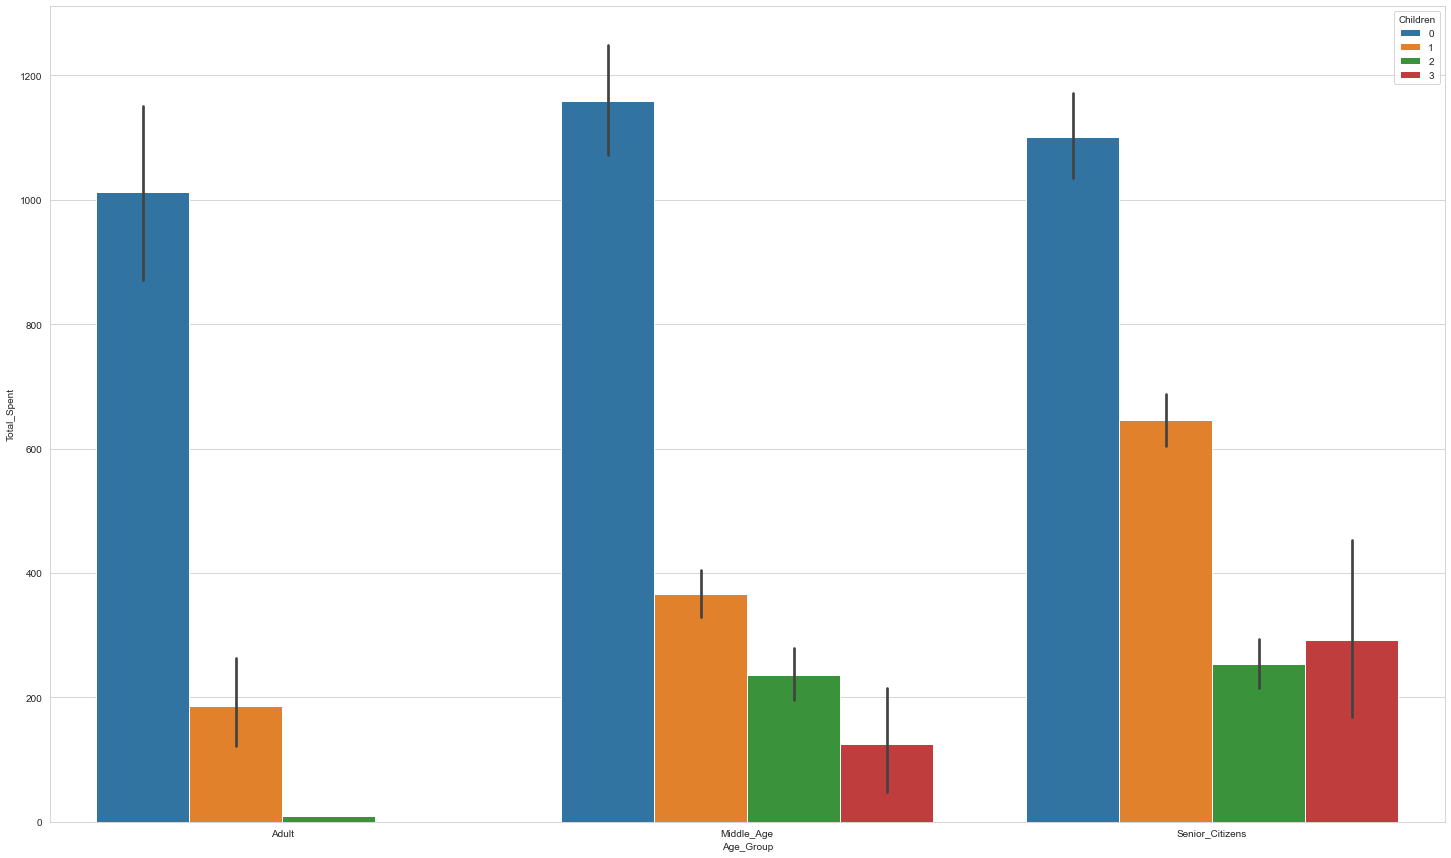

In [677]:
plt.figure(figsize = (25, 15))
sns.barplot(x = 'Age_Group', y = 'Total_Spent', hue = 'Children', data = marketing_data)

The Middle_Age purchases more products in the last two years as compared to other clusters of customers.

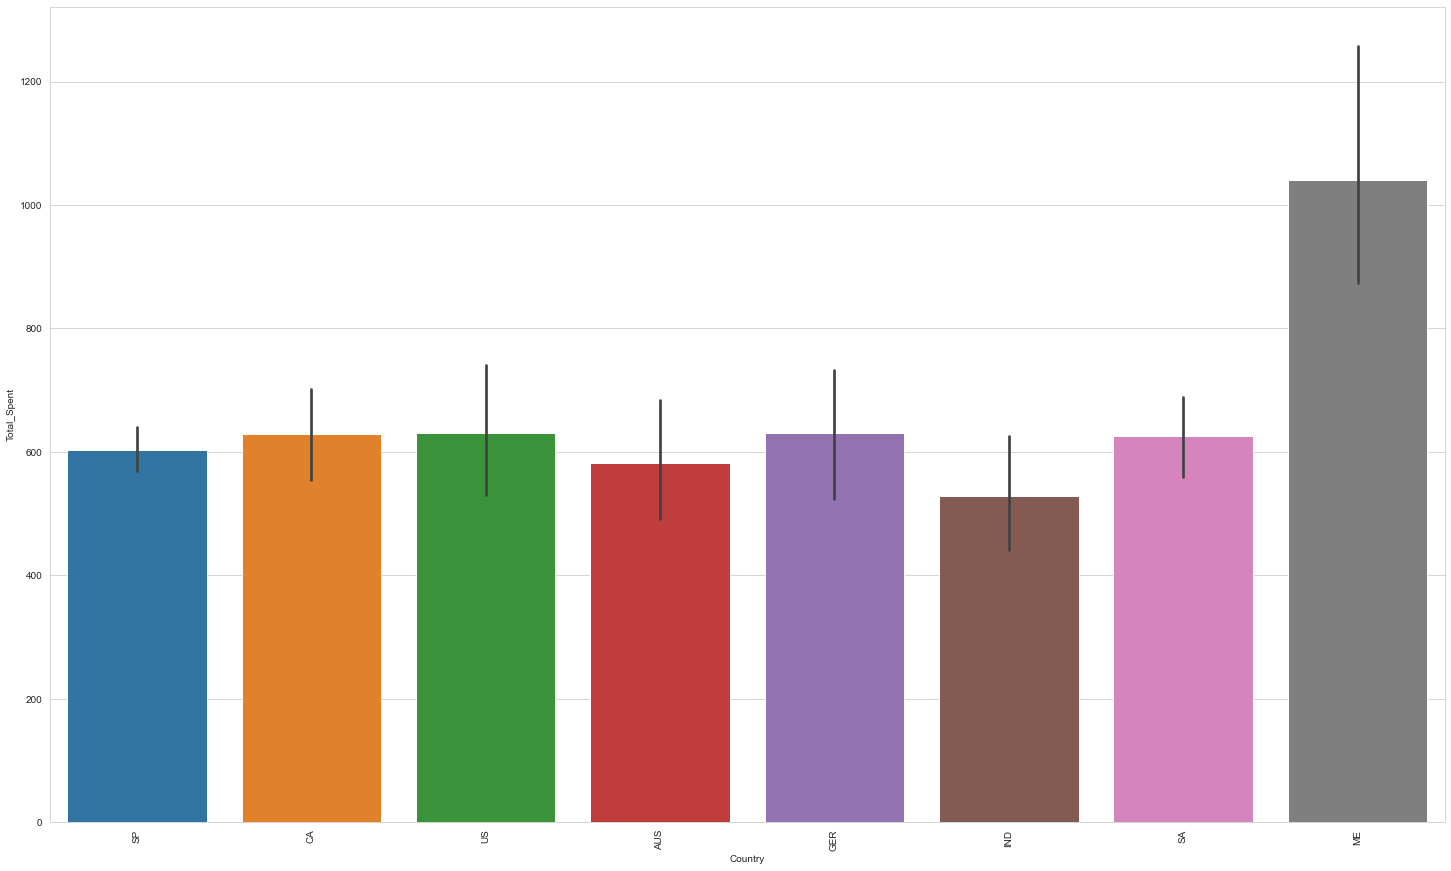

In [692]:
# Best Selling by country
plt.figure(figsize = (25, 15))
ax = sns.barplot(x = 'Country', y = 'Total_Spent', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Montenegro has the highest frequencies of purchases over the last two years. This country has the lowest customers in terms of volume, but has more customers that are loyal to the company and has a healthy and better purchase histroy over the last two years than other countries.  This country also has the highest salary earners for the customers. 

The marketing analyst should pay more attention to customers in this country by executing targeted campaigns to grow this country for better sales.

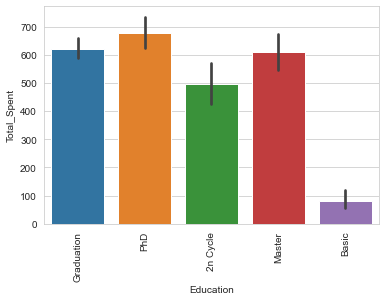

In [407]:
# Best customers by Education class

ax = sns.barplot(x = 'Education', y = 'Total_Spent', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

PhD class purchases more products from the exploratory analysis.

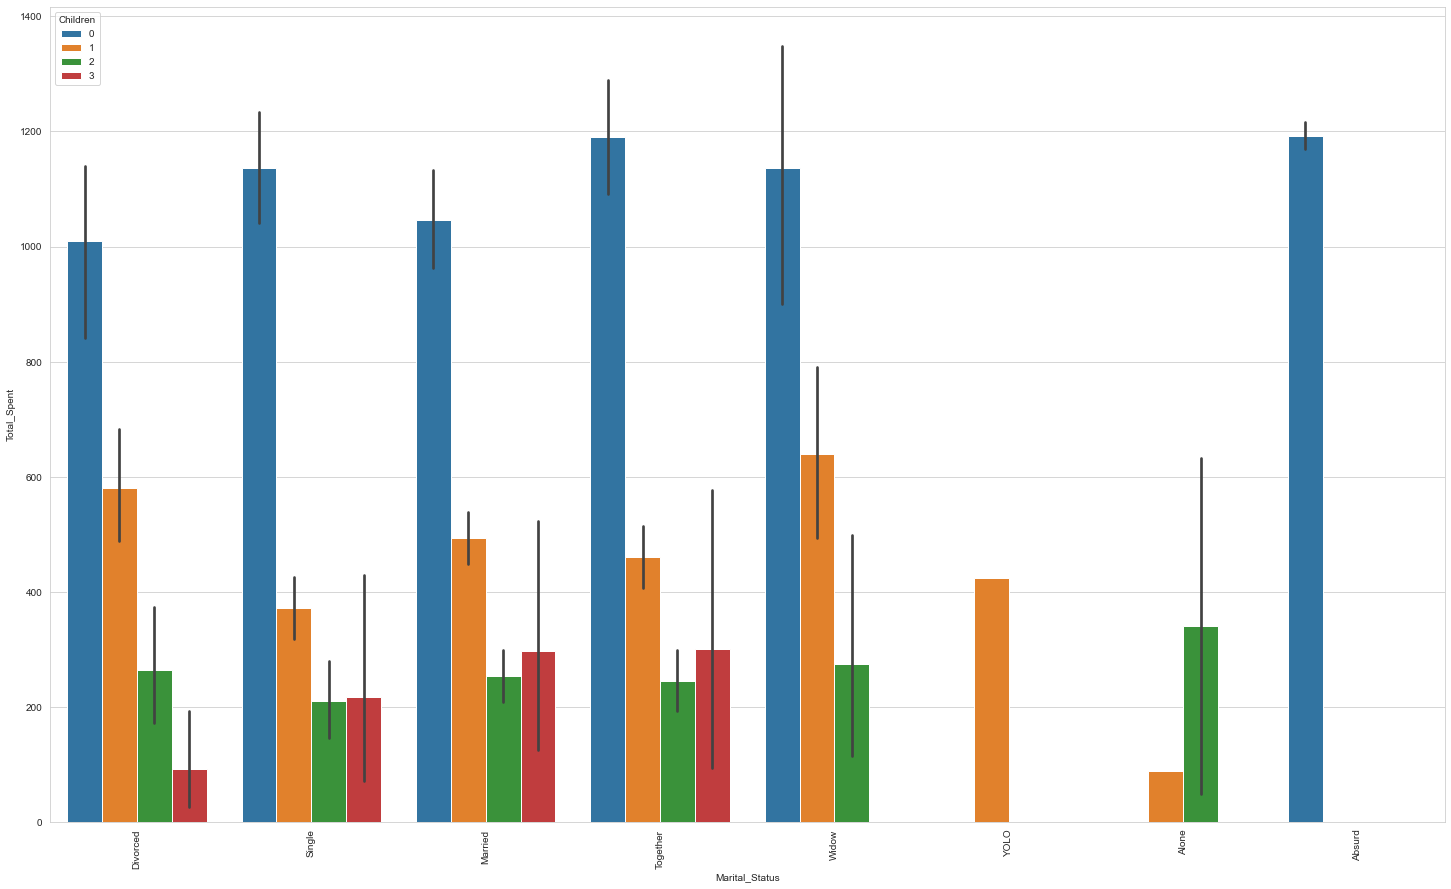

In [694]:
plt.figure(figsize = (25, 15))
ax = sns.barplot(x = 'Marital_Status', y = 'Total_Spent', hue= 'Children', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Absurd group purchases more products from the exploratory analysis above

In [695]:
marketing_wine = marketing_data.groupby(['Total_Spent'])['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'].mean().reset_index()

marketing_wine.nlargest(10, 'Total_Spent')

,Total_Spent,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
1046,2525,1156.0,120.0,915.0,94.0,144.0,96.0
1045,2524,1259.0,172.0,815.0,97.0,148.0,33.0
1044,2486,1394.0,22.0,708.0,89.0,91.0,182.0
1043,2440,1315.0,22.0,780.0,145.0,0.0,178.0
1042,2352,1083.0,108.0,649.0,253.0,151.0,108.0
1041,2349,1302.0,68.0,731.0,89.0,114.0,45.0
1040,2346,968.0,147.0,842.0,137.0,42.0,210.0
1039,2302,1111.0,24.0,790.0,160.0,45.0,172.0
1038,2283,966.0,168.0,672.0,246.0,105.0,126.0
1037,2279,736.0,63.0,946.0,219.0,189.0,126.0


In [411]:
goods_purchased = marketing_data[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 
                                  'MntSweetProducts', 'MntGoldProds' ]]

<AxesSubplot:>

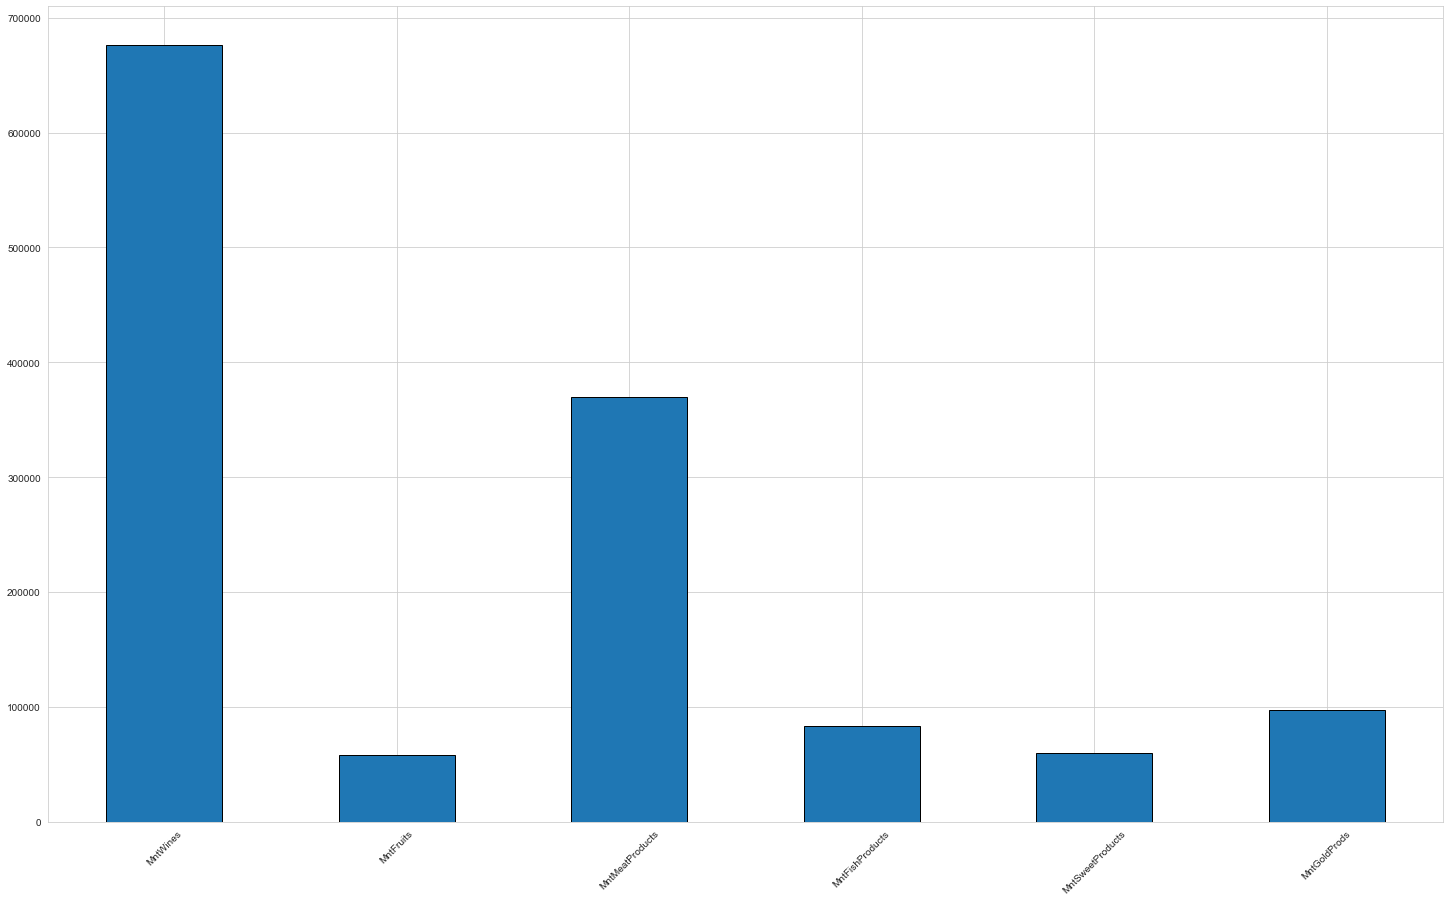

In [696]:
goods_purchased.sum().plot(kind='bar',figsize=(25,15),edgecolor=(0,0,0), rot=45)


In [697]:
plt.figure(figsize = (25, 15))
ax = sns.barplot(x = 'Marital_Status', y = 'Total_Spent', hue= 'goods_purchased', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

ValueError: Could not interpret input 'goods_purchased'

<Figure size 1800x1080 with 0 Axes>

 Recency - Number of days since customers' last purchase

In [413]:
last_purchased = marketing_data.groupby(['Recency'])['Age'].mean().reset_index()

last_purchased.nlargest(10, 'Recency')

,Recency,Age
99,99,53.000000
98,98,47.863636
97,97,51.750000
96,96,55.695652
95,95,47.777778
94,94,47.192308
93,93,48.809524
92,92,56.466667
91,91,53.500000
90,90,54.700000


<AxesSubplot:xlabel='Recency', ylabel='Density'>

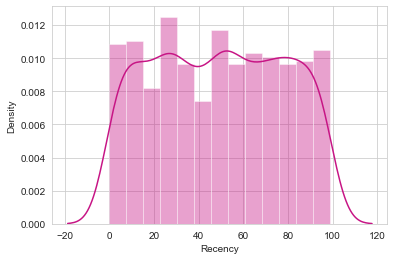

In [414]:
plt.figurefigsize = (10, 5 )
sns.distplot(marketing_data['Recency'], color = 'mediumvioletred')

The last purchased by customers took place from day 1 to 99 day

Best selling product of preference by customers are wines, and the least sold products are MntFishProducts and MntSweetProducts.

### Lifetime of a customer over a period of time

Top customers based on sales history


In [415]:
marketing_data['Dt_Customer'] = pd.to_datetime(marketing_data['Dt_Customer'])

In [416]:
marketing_data['present_date'] = '2021/02/08'

In [417]:
marketing_data['present_date']  = pd.to_datetime(marketing_data['present_date'])

In [418]:
import datetime as dt

In [419]:
marketing_data['customer_lifetime'] = (marketing_data['present_date'].sub(marketing_data['Dt_Customer']).dt.days.div(365).round(1))

In [420]:
marketing_data.head(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Response,Complain,Country,Children,Age,Age_Group,Total_Spent,present_date,customer_lifetime
0,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,...,0,1,0,SP,0,51,Old,1190,2021-02-08,6.7
1,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,...,1,1,0,CA,0,60,Old,577,2021-02-08,6.7
2,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,...,0,0,0,US,1,63,Old,251,2021-02-08,6.7
3,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,...,0,0,0,AUS,2,54,Old,11,2021-02-08,6.8
4,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,...,0,1,0,SP,1,32,Adult,91,2021-02-08,6.8
5,PhD,Single,71691.0,0,0,2014-03-17,0,336,130,411,...,0,1,0,SP,0,63,Old,1192,2021-02-08,6.9
6,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,80,252,...,0,1,0,GER,0,67,Old,1215,2021-02-08,7.0
7,Graduation,Together,44931.0,0,1,2014-01-18,0,78,0,11,...,0,0,0,SP,1,54,Old,96,2021-02-08,7.1
8,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,...,0,0,0,US,1,67,Old,544,2021-02-08,7.1
9,PhD,Married,65324.0,0,1,2014-01-11,0,384,0,102,...,0,0,0,IND,1,67,Old,544,2021-02-08,7.1


In [421]:
# Customer life time in years

marketing_data['customer_lifetime'].reset_index()

,index,customer_lifetime
0,0,6.7
1,1,6.7
2,2,6.7
3,3,6.8
4,4,6.8
...,...,...
2211,2235,7.9
2212,2236,8.1
2213,2237,8.2
2214,2238,8.2


Loyal and satisfied customers have been with the company for 6 years, 8 months to 8 years, 4 months.


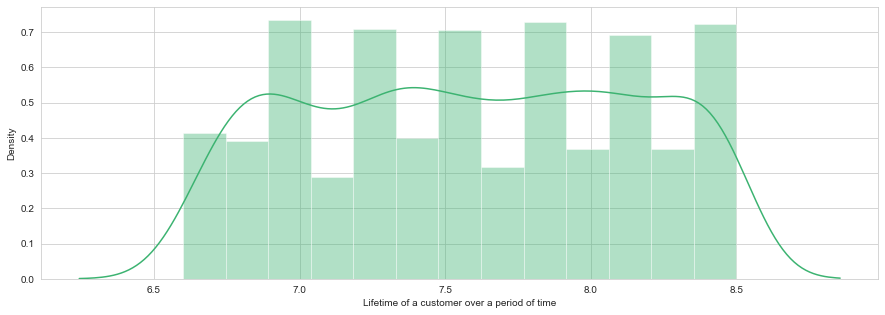

In [422]:
plt.figure(figsize = (15, 5))
sns.distplot(marketing_data['customer_lifetime'], color = 'mediumseagreen')
plt.xlabel('Lifetime of a customer over a period of time')

print('Loyal and satisfied customers have been with the company for 6 years, 8 months to 8 years, 4 months.')

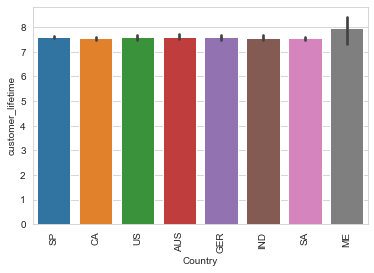

In [423]:
# Best Selling by country
ax = sns.barplot(x = 'Country', y = 'customer_lifetime', data = marketing_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

The average lifetime of custermers per country, shows ME has a longer customer retention and brand loyalty as compared to other customers from other countries.

In [424]:
marketing_data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Children', 'Age', 'Age_Group',
       'Total_Spent', 'present_date', 'customer_lifetime'],
      dtype='object')

### Campaign effectiveness and channels analysis


Number of customers who visited the website was on the increase.
Number of purchases made directly in stores recorded more sales compared to other channels


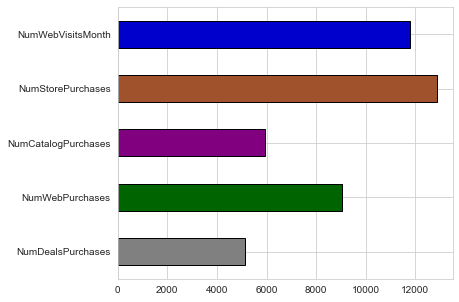

In [425]:
# Which of the channels are performing better?

campaign_channels = marketing_data[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']]
colors='gray','darkgreen', 'purple', 'sienna', 'mediumblue'
campaign_channels.sum().plot(kind='barh',figsize=(6,5),edgecolor=(0,0,0), color=colors)

print('Number of customers who visited the website was on the increase.')

print('Number of purchases made directly in stores recorded more sales compared to other channels')

#### Analysing the campaign effectiveness with their response rate

In [426]:
campaign_strategy = marketing_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

In [427]:
campaign_strategy.head(100)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,0,0,0,0,1
1,0,1,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,1
...,...,...,...,...,...,...
95,0,0,0,0,0,0
96,0,0,0,0,0,0
97,0,0,0,0,0,1
98,0,0,0,0,0,0


In [428]:
# sns.set_style('whitegrid')
#sns.countplot(x='Response', hue='AcceptedCmp1', data =campaign_strategy, palette='RdBu_r')

<AxesSubplot:xlabel='AcceptedCmp1', ylabel='count'>

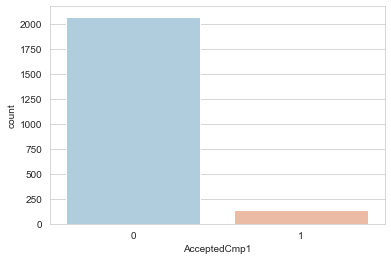

In [429]:
sns.set_style('whitegrid')
sns.countplot(x='AcceptedCmp1', data =campaign_strategy, palette='RdBu_r')

In [430]:
#After first campaign:  about 1755 people who did not take the campaign did not eventually signup
#                       about 50 people tht accepted the first campaign but did not eventuall signup
#                       about 250 people didnt accespt the first campaign but eventually signed up
#                       about 50 people accepted the campaign and also signed up

The customers did not accept campaign 2 and did not even sign up for it


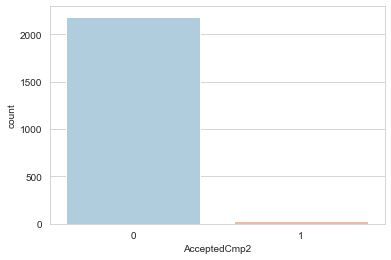

In [431]:
sns.countplot(x='AcceptedCmp2', data =campaign_strategy, palette='RdBu_r')

print('The customers did not accept campaign 2 and did not even sign up for it')

In [432]:
# Campaign 2 was not properly exposed

<AxesSubplot:xlabel='AcceptedCmp3', ylabel='count'>

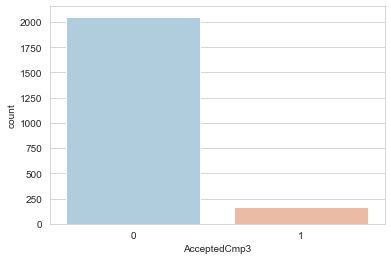

In [433]:
sns.countplot(x='AcceptedCmp3', data =campaign_strategy, palette='RdBu_r')

<AxesSubplot:xlabel='AcceptedCmp4', ylabel='count'>

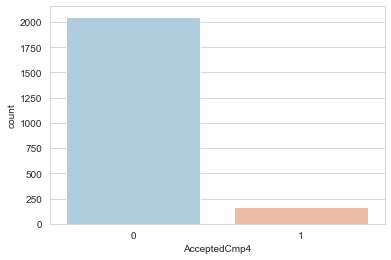

In [434]:
sns.countplot(x='AcceptedCmp4', data =campaign_strategy, palette='RdBu_r')

<AxesSubplot:xlabel='AcceptedCmp5', ylabel='count'>

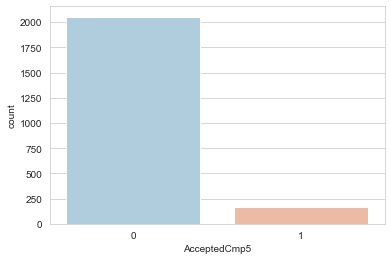

In [435]:
sns.countplot(x='AcceptedCmp5', data =campaign_strategy, palette='RdBu_r')

Campaign 1,3,4 and 5 seems to yield little success, few customers accepted the campaign and also signed up unlike campaign 2 which was a total mess(campaign two needs to be restrategised)

In [436]:
campaign_strategy.head(100)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,0,0,0,0,1
1,0,1,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,1
...,...,...,...,...,...,...
95,0,0,0,0,0,0
96,0,0,0,0,0,0
97,0,0,0,0,0,1
98,0,0,0,0,0,0


In [437]:
marketing_data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Children', 'Age', 'Age_Group',
       'Total_Spent', 'present_date', 'customer_lifetime'],
      dtype='object')

In [438]:
campaign1 = marketing_data.groupby(['AcceptedCmp1'])['Education', 'Marital_Status','Income', 'Country'].mean().reset_index()


In [439]:
#camp1 = marketing_data.groupby(['AcceptedCmp1'])['Country'].mean().reset_index()

In [440]:
campaign1.head(20)

,AcceptedCmp1,Income
0,0,50424.298939
1,1,78872.626761


In [441]:
#sns.set_style('whitegrid')
#sns.countplot(x='AcceptedCmp1', hue='Income', data = marketing_data, palette='RdBu_r')
#plt.show()

Observations:
The top 5 years of customer's birth fall on the 1970s.
Most are married and met graduation as highest education level.
The majority of clients make under $100,000 and over half of them do not have kids or teens at home.
Country listed the most is Spain and country with the highest sales is ME


Recommendations/Suggestion;

Based on my insights from the exploratory data analysis, the marketing campaigns was not as effective as they were expected to be, because the company failed to identify their target consumer, also, some countries like Spain had more consumer for this brand, but Montenegro had the least consumers and this country generates more cash flow in terms of total spent compared to other countries. The marketing analyst should restrategise and focus in this market.

Secondly, the campaigns did not have correct or realistic success metrics, it appeared as though the campaign was a total failure, but it was not as bad as they thought. For instance, the number of customers who visted the brand website was on the increase and more customers also made purchases directly in stores.Therefore, the marketing analyst should Look at all of the metrics of success before they launch a campaign and come up with realistic, attainable goals for marketing campaign.

Finally, the campaign was not given enough time to be effective, several campaigns were executed when the previous ones were not  successful. When you don’t get the results you want from a marketing campaign it can be disheartening, to say the least. And the last thing you want to do is sink more time and money into a failing campaign. But at the same time, you need to ensure you give your marketing campaign enough time to succeed. The best way to do this is to set goals and timelines before the campaign launch. 

In [442]:
# Saving this dataset as a csv file

In [443]:
marketing_data.to_csv('clean_marketing_data.csv', index=None)

Looks like you are looking into different levels of data (I've heard customers, cashflows, campaign performance), make sure you aggregate the data to the level that you are interested in. I would assume customers is the level of detail and you want to see features for previous behaviour so the target would be if they purchased as a result of the campaign? By Thomas

In [444]:
#marketing_data['Age'] = pd.cut(marketing_data.Age, bins=[0,35,50,150], labels=['Adult','Middle','Old'])